# Spectra, spectrograms, and aliasing
### TSE228  Signal Processing. Lab 2, Spring 2025

## 3.2 Beat

In [5]:
import numpy as np					# Handle signals as arrays
import matplotlib.pyplot as plt		# Show results as graphs and images
from math import pi, cos, sin, tan	# Mathematical functions on scalars
from cmath import exp, sqrt     	# Complex mathematical functions on scalars

from scipy import signal

import lab2

### 1)
The code for generating a beat is written into lab2.py

### 2)
The code for plotting the beat and its power spectrum is shown below.

The time trace consists of a high-frequency sinusoid enclosed in a low frequency envelope. The frequency of the envelope is 10 Hz, which agrees with the specified value for $f_{\Delta}$.

The spectrum consists of two peaks, one at 390 Hx and one at 410 Hz. this agrees with the values $f_1 = f_0 - f_{\Delta}$ and $f_1 = f_0 + f_{\Delta}$.


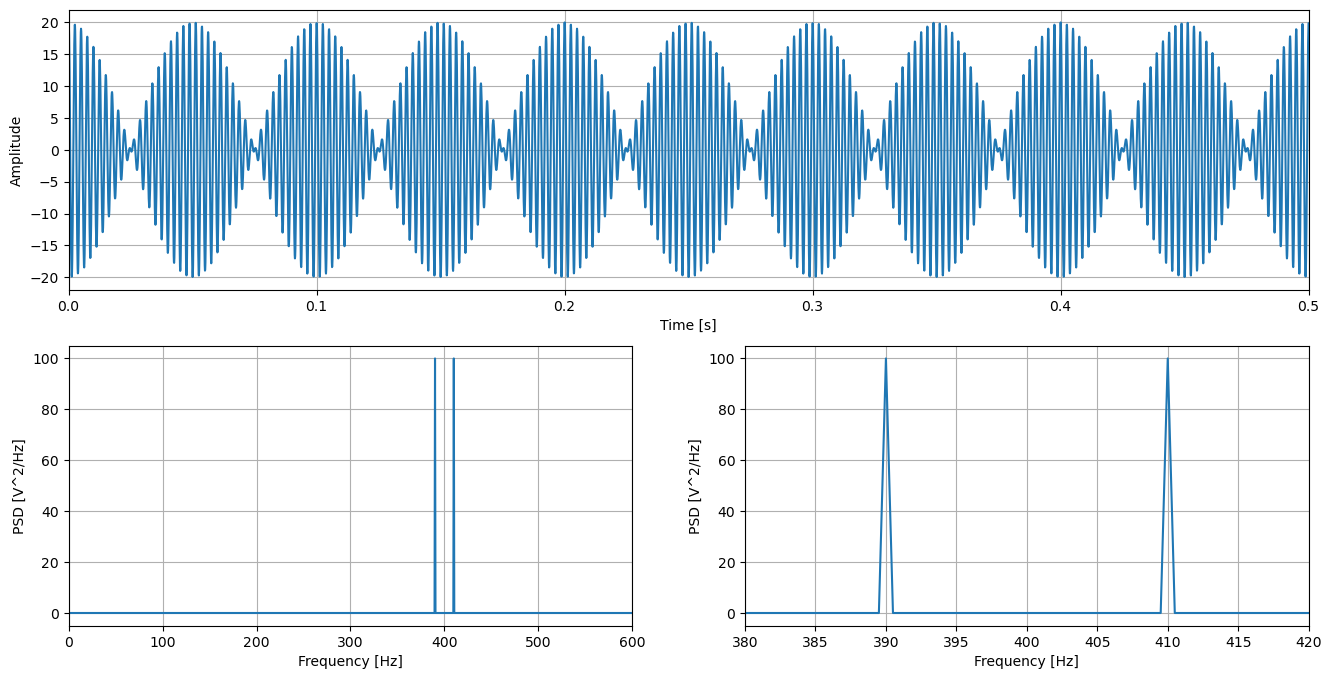

In [7]:
# Plot from beat
def plot_beat(x, t):
    fig = plt.figure(figsize = [16, 8])
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(t, x)
    ax1.set(xlabel="Time [s]",
           ylabel="Amplitude",
           xlim = (0, 0.5))
    ax1.grid(True)
    
    f, pxx = signal.periodogram(x, fs)		# Calculate PSD (pxx) and frequencies (f)
    		
    ax2 = fig.add_subplot(2, 2, 3)  # Subplot for power spectral density
    ax2.plot(f, pxx)				# Power spectral density
    ax2.set(xlabel="Frequency [Hz]",
            ylabel="PSD [V^2/Hz]", 
            xlim = (0, 600))	
    ax2.grid(True)

    ax3 = fig.add_subplot(2, 2, 4)  # Subplot for power spectral density
    ax3.plot(f, pxx)				# Power spectral density
    ax3.set(xlabel="Frequency [Hz]",
            ylabel="PSD [V^2/Hz]", 
            xlim = (380, 420))	
    ax3.grid(True)

    return ax1, ax2, ax3

A1 = 10
A2 = 10
fc = 400
fd = 10
fs = 11025			# Sample rate, 1/4 of the standard 44.1 kHz
duration = 2.0

x, t = lab2.make_beat([A1, A2], fc, fd, fs, duration)
ax1, ax2, ax3 = plot_beat(x,t) 

### 3)
The sound agrees with a signal at frequency 400 Hz where the amplitude varies as seen in the graph, the period in the variations is $1/(2f_{\Delta})$= 0.05 s or 1/20 s

In [9]:
import sounddevice as sd
sd.play(x, fs)

### 4)
The new difference frequencies make the amplitude variations slower and moves the frequency peaks closer
\begin{align}
    f_{\Delta} &= 5 Hz  & f_1&= 395 Hz & f_2&= 405 Hz \\
    f_{\Delta} &= 2 Hz  & f_1&= 398 Hz & f_2&= 402 Hz     
\end{align}

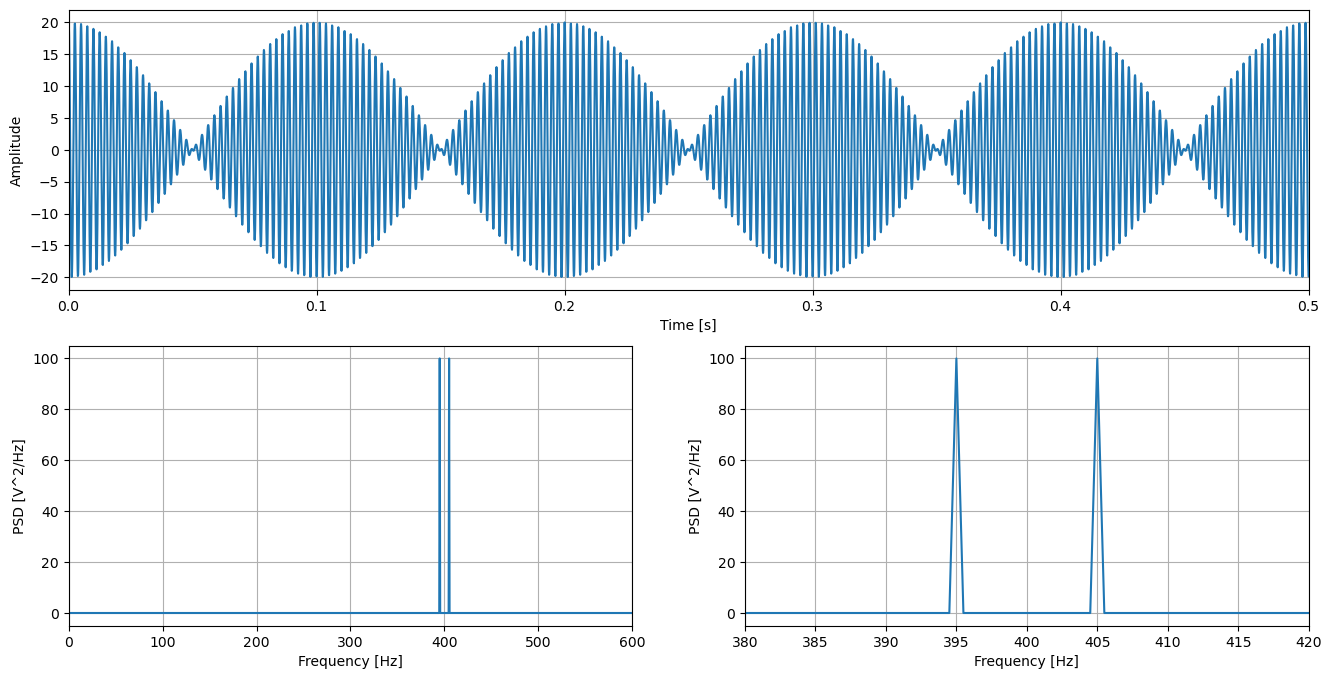

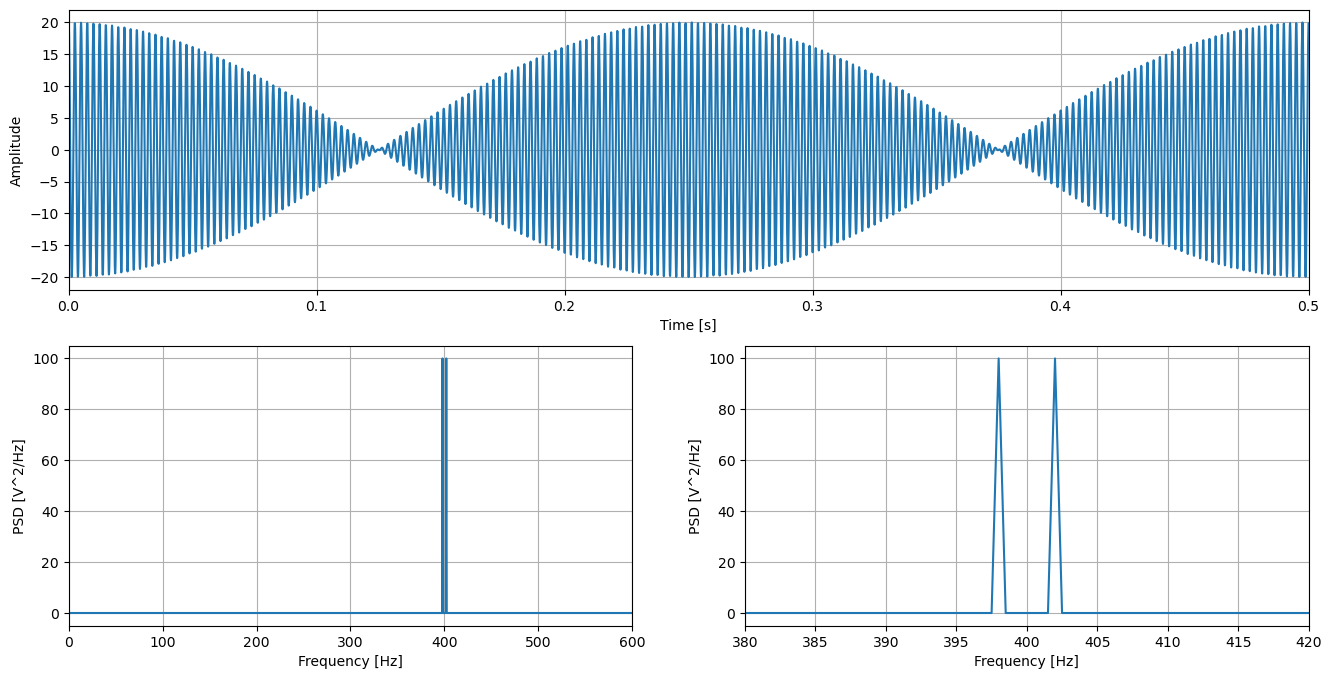

In [11]:
fd = 5
x5, t = lab2.make_beat([A1, A2], fc, fd, fs, duration)
plot_beat(x5,t) 
sd.play(x5, fs)
sd.wait()

fd = 2
x2, t = lab2.make_beat([A1, A2], fc, fd, fs, duration)
plot_beat(x2,t) 
sd.play(x2, fs)
sd.wait()



### 5)

[(900.0, 1100.0)]

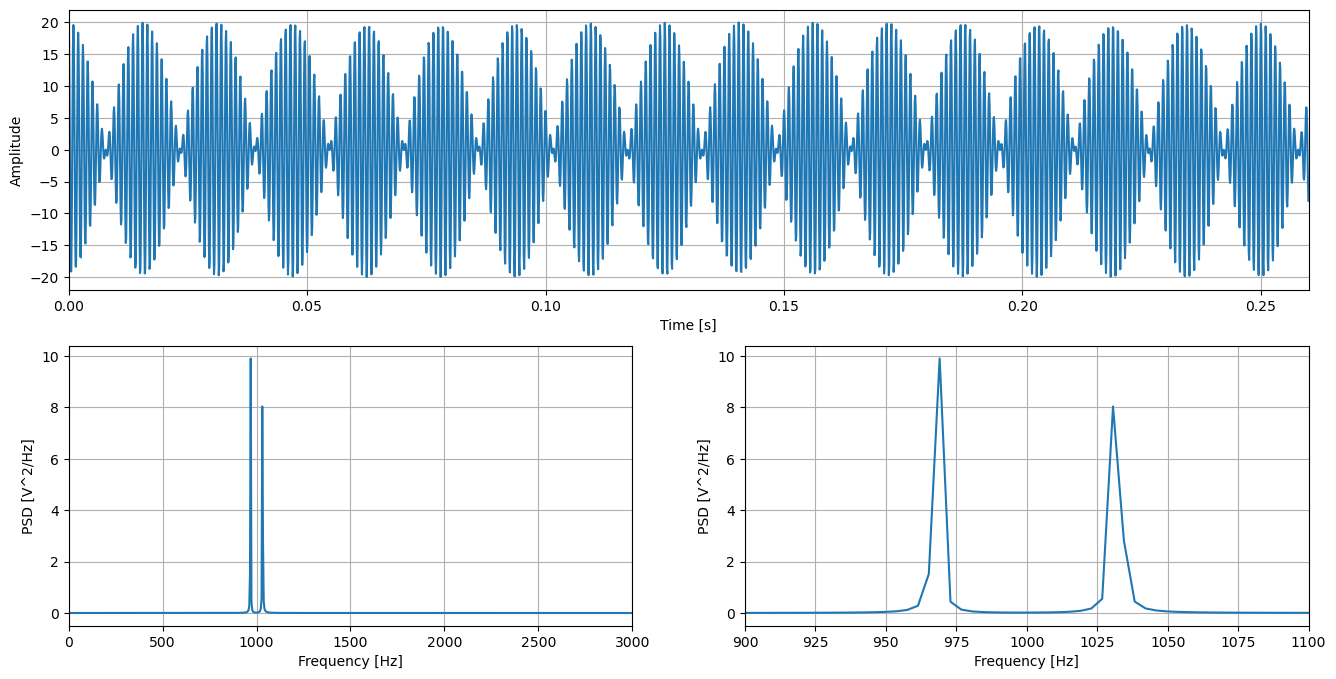

In [13]:
A1 = 10
A2 = 10

fc = 1000
fd = 32
fs = 11025

duration = 0.26

x, t = lab2.make_beat([A1, A2], fc, fd, fs, duration)
ax1, ax2, ax3 = plot_beat(x,t) 
ax1.set(xlim=(0, duration))
ax2.set(xlim=(0, 3000))
ax3.set(xlim=(900, 1100))



### 6)
The spectrograms is  shown below.

The two lines at $1000 \pm 32$ Hz are clearly seen.


Text(0.5, 1.0, 'Segment length 1024 points. df = 10.8 Hz')

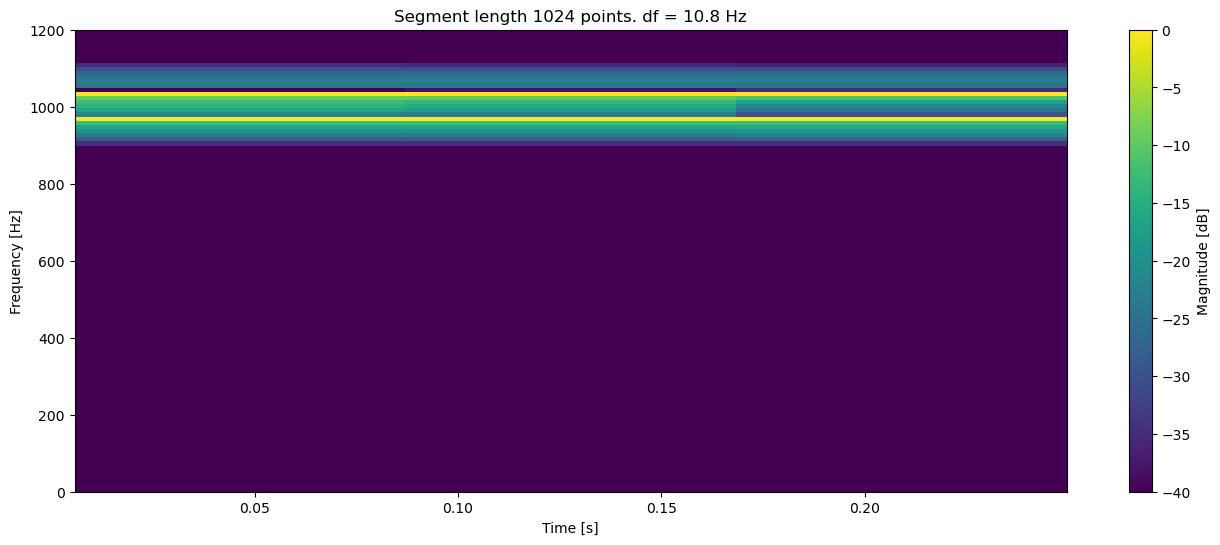

In [18]:
n_segment = 1024
ax = lab2.plot_spectrogram(x, t, fs, n_segment, 1200)
df = fs/np.array(n_segment)
ax.set_title(f"Segment length {n_segment} points. df = {df:.1f} Hz")


### 7)
Spectrograms for the different segment lenghts are shown below.

As the segments get shorter, the lines start to broaden out and are not soe eassy to separate. 

The lines are clearly separable for segment length 512 samples. Separation is difficult at 256 points and impossible at 128 points.

The frequency resolution is 
\begin{align}
    \Delta f &= \frac{1}{T_0} = \frac{f_s}{N_s} 
\end{align}
where $f_s$ is the sample rate and $N_s$ is the number of samples in the segment.

For $f_s$= 11025 Samples/s, this gives
\begin{align}
    N_s &=  512 & \Delta f &= 21.5 Hz \\
    N_s &=  265 & \Delta f &= 43.1 Hz \\
    N_s &=  128 & \Delta f &= 86.1 Hz 
\end{align}
The separation between the lines is $2f_{\Delta}$=64 Hz, so this agrees well with the spectrograms.


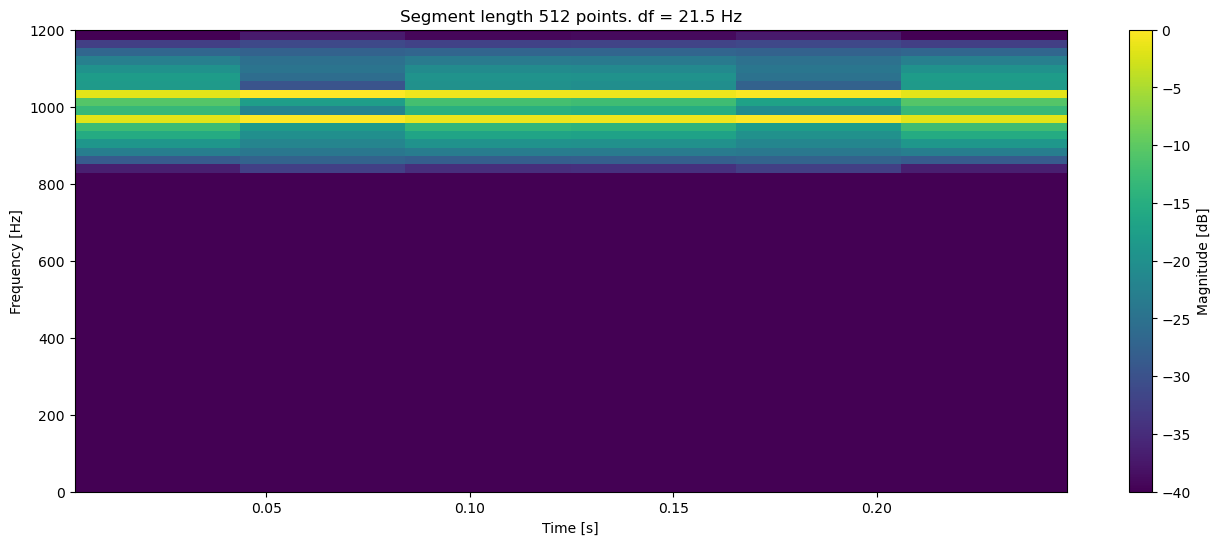

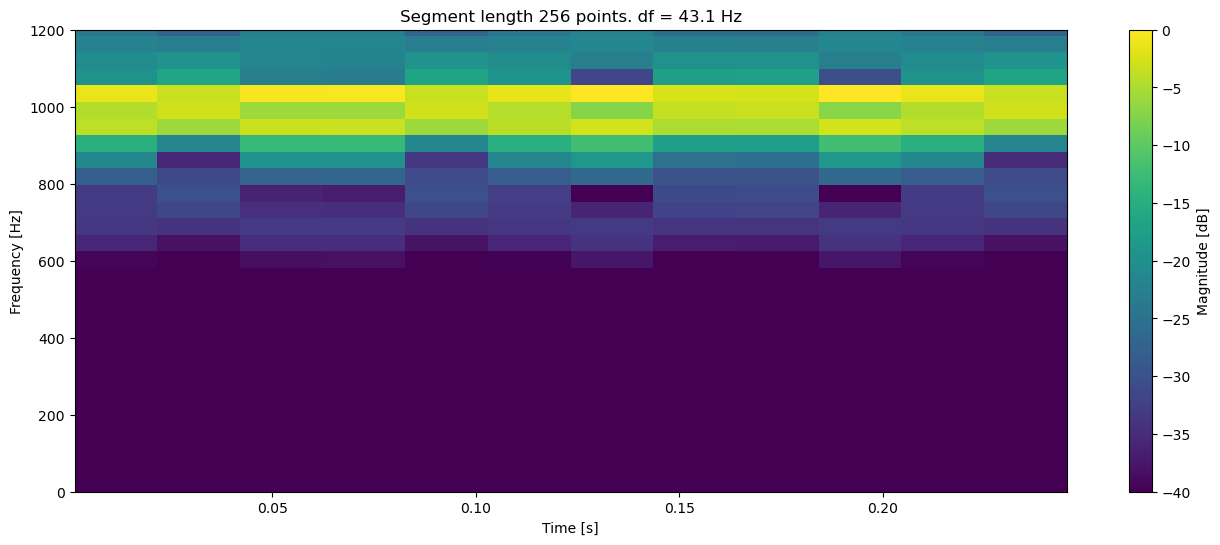

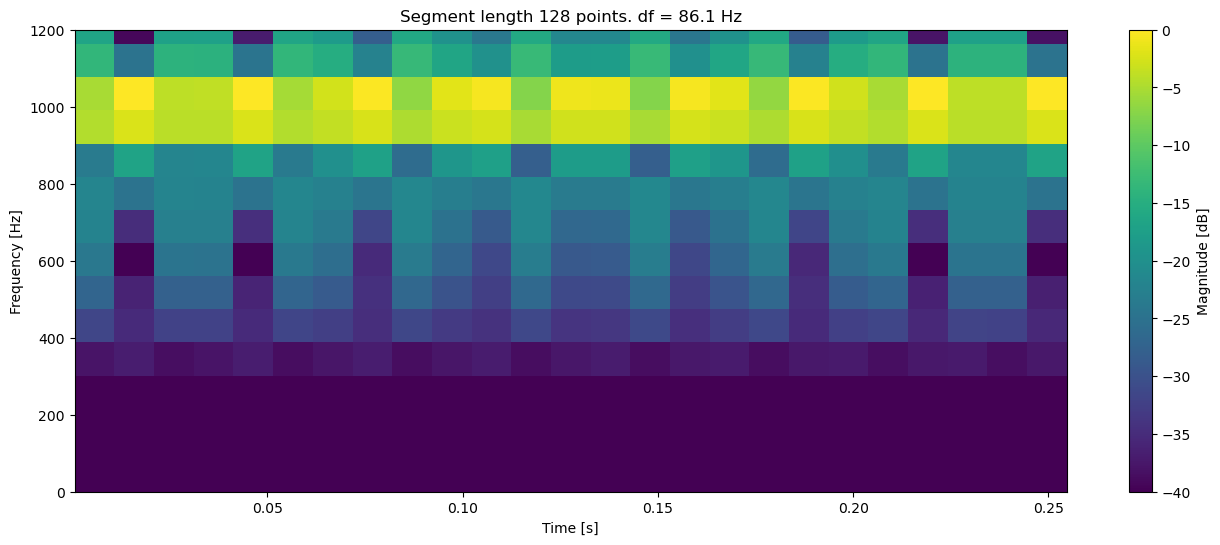

In [21]:
for n_segment in [512, 256, 128]:
    ax = lab2.plot_spectrogram(x, t, fs, n_segment, 1200)
    df = fs/np.array(n_segment)
    ax.set_title(f"Segment length {n_segment} points. df = {df:.1f} Hz")
